In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\asus\Documents\habibie\FIS 6\data_permohonan_2023-2025_rev.xlsx'  # Sesuaikan dengan lokasi file
df = pd.read_excel(file_path, sheet_name="2023_2025")

In [3]:
tempat_peng = df.columns[19]
print (tempat_peng)

JENIS_UJI


In [6]:
tmpt_counts = df[tempat_peng].value_counts().reset_index()
tmpt_counts.columns = ['Tempat Pengujian', 'Jumlah']

C:\Users\asus\AppData\Local\Temp\ipykernel_22904\7939193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Jumlah', y = 'Tempat Pengujian', data= tmpt_counts, palette = 'magma')


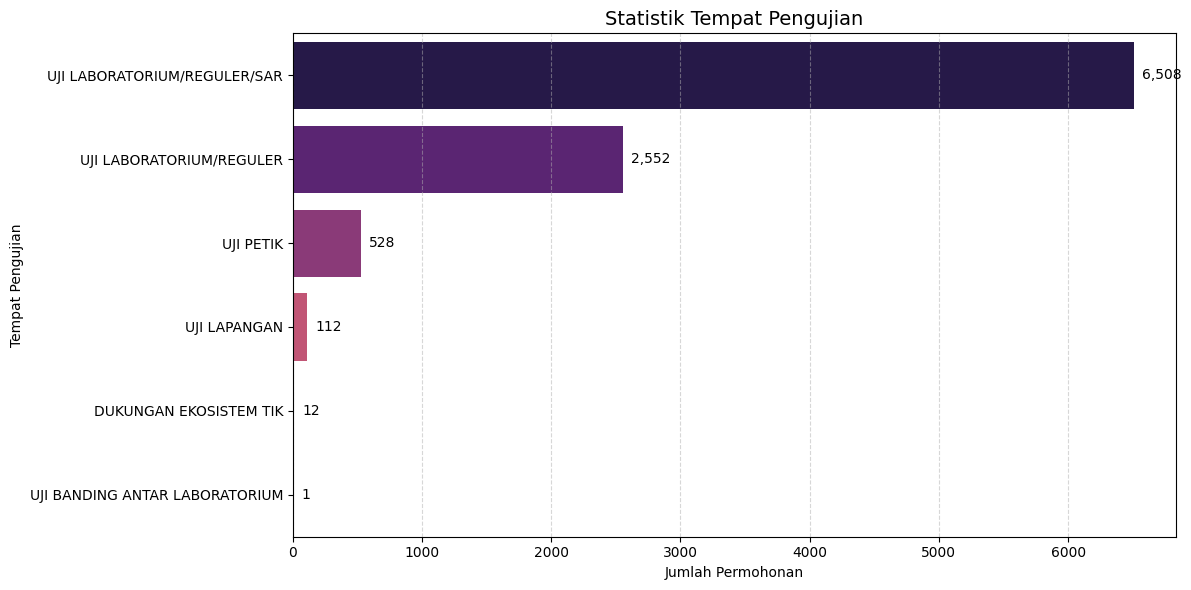

In [7]:

# Buat visualisasi bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Jumlah', y = 'Tempat Pengujian', data= tmpt_counts, palette = 'magma')
# sns.barplot(data=tmpt_counts, x='Jumlah', y='Tempat Pengujian', palette='magma')
for i, (value, name) in enumerate(zip(tmpt_counts['Jumlah'], tmpt_counts['Tempat Pengujian'])):
    plt.text(value + max (tmpt_counts['Jumlah']) *0.01, i, f'{value:,}',va='center')

plt.title('Statistik Tempat Pengujian', fontsize=14)
plt.xlabel('Jumlah Permohonan')
plt.ylabel('Tempat Pengujian')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Ambil kolom tanggal permohonan (misalnya kolom C = indeks ke-2) → sesuaikan kalau beda
tanggal_col = df.columns[9]
print (tanggal_col)

JADWAL_MULAI


In [8]:
# Ubah ke format datetime
df[tanggal_col] = pd.to_datetime(df[tanggal_col], errors='coerce')

In [9]:
df['Tahun'] = df[tanggal_col].dt.year

In [10]:
# Hitung jumlah permohonan per negara per tahun
pivot_data = df.groupby(['Tahun', tempat_peng]).size().reset_index(name='Jumlah')

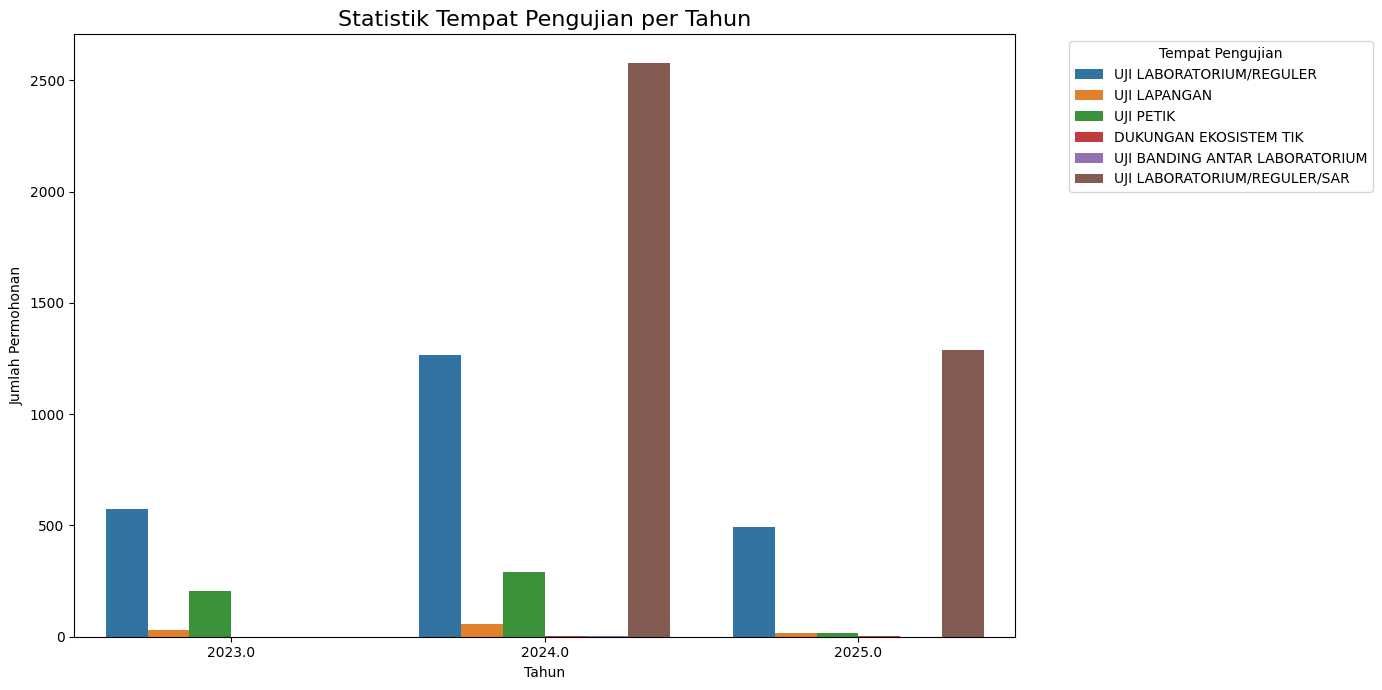

In [11]:
# Buat plot
plt.figure(figsize=(14, 7))
sns.barplot(data=pivot_data, x='Tahun', y='Jumlah', hue=tempat_peng, palette='tab10')

plt.title('Statistik Tempat Pengujian per Tahun', fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Permohonan')
plt.legend(title='Tempat Pengujian', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# Konversi ke datetime
df[tanggal_col] = pd.to_datetime(df[tanggal_col], errors='coerce')
df['Tahun'] = df[tanggal_col].dt.year

In [13]:
# Ambil daftar tahun unik
tahun_unik = df['Tahun'].dropna().unique()

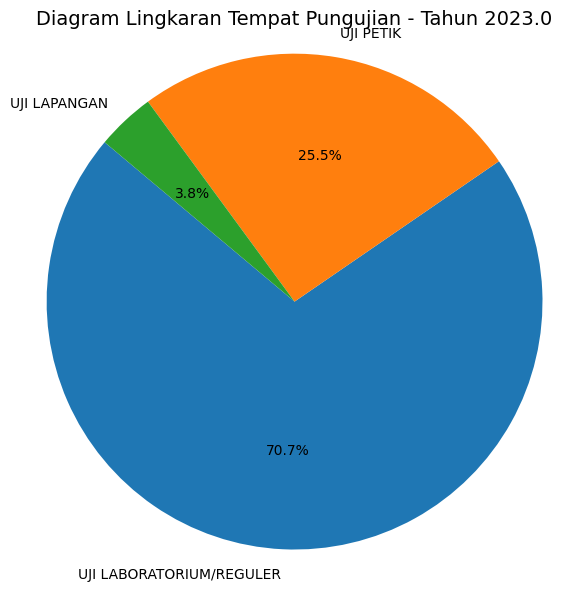

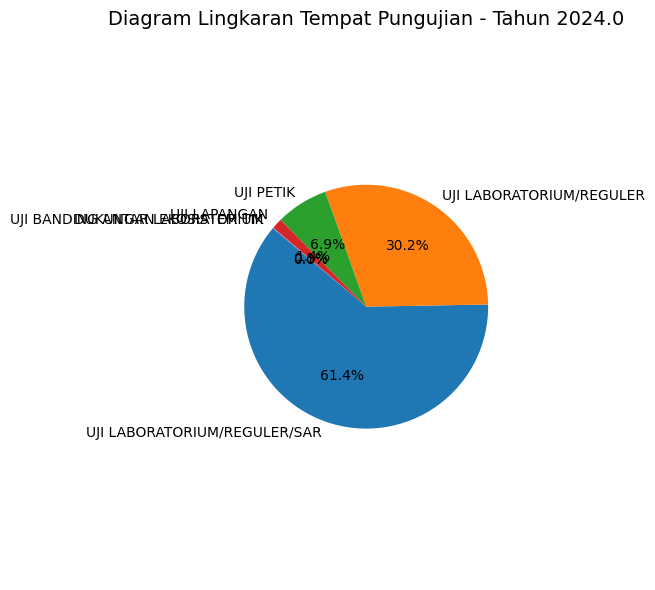

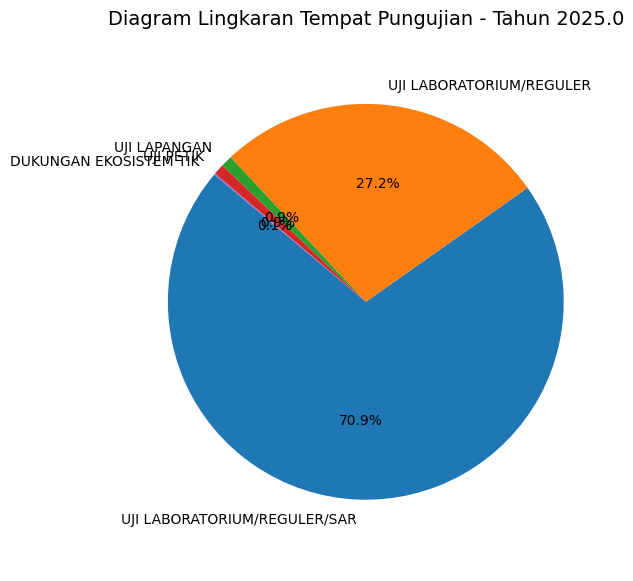

In [14]:
# Buat pie chart untuk setiap tahun
for tahun in sorted(tahun_unik):
    data_tahun = df[df['Tahun'] == tahun]
    negara_counts = data_tahun[tempat_peng].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(negara_counts, labels=negara_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Diagram Lingkaran Tempat Pungujian - Tahun {tahun}', fontsize=14)
    plt.axis('equal')  # Biar pie-nya bulat sempurna
    plt.tight_layout()
    plt.show()